![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicio 01. Métodos Numéricos Básicos

## B. Rejillas de Difrección

Considere radiación electromagnética con longitud de onda $\lambda$ incidente en una rejilla de difracción con ancho total $w$. Luego de ser difractada, la luz es enfocada por una lente de longitud focal $f$ y es registrada en una pantalla (ver Figura).

El patrón de difracción en la pantalla estará descrito por la relación 
\begin{equation}
    I(x) = \left| \int^{\frac{w}{2}}_{-\frac{w}{2}} \sqrt{q(u)} \exp{\left(\frac{2\pi i xu}{\lambda f}\right)} du \right|^2,
\end{equation}
donde $x$ es la distancia sobre la pantalla desde el eje central del sistema y $q(u)$ es la función de transmisión de intensidad de la rejilla a una distancia $u$ del eje central (esta función representa la fracción de luz incidente que la rejilla deja atravesar).

---

1. Suponga que la función de transmisión de una rejilla es $q(u) = \sin^2 (\alpha u)$ donde $\alpha$ es un parámetro constante. Encuentre la relación entre $\alpha$ y la separación entre los "slits" de la rejilla.


Los extremos en la función de transmisión estarán dados por la ecuación

\begin{equation}
\frac{dq}{du} = 2 \alpha \sin (\alpha u) \cos(\alpha u) = 0
\end{equation}

que da como resultado las ubicaciones

\begin{equation}
\alpha u = 
\begin{cases}
0, \pi, 2\pi, 3\pi, ...  & (\text{ debido a la función } \sin )\\
\frac{\pi}{2}, \frac{3\pi}{2}, \frac{5\pi}{2}, ... & (\text{ debido a la función } \cos )
\end{cases}
\end{equation}

lo cual puede resumirse en la expresión

\begin{equation}
\alpha u_n = \frac{n\pi}{2}
\end{equation}

con $n=0,1,2,3,...$. 

Como se puede ver de la siguiente gráfica, máximos y mínimos estan intercalados y por ello la separación entre dos máximos consecutivos (i.e. la separación entre los slits) es de

\begin{equation}
\Delta u = \ell = \frac{\pi}{\alpha }
\end{equation}

---
2. Escriba una función que calcule la función de transmisión $q(u) = \sin^2 (\alpha u)$ para una rejilla con una separación de $20 \text{ } \mu \text{m}$ entre slits.

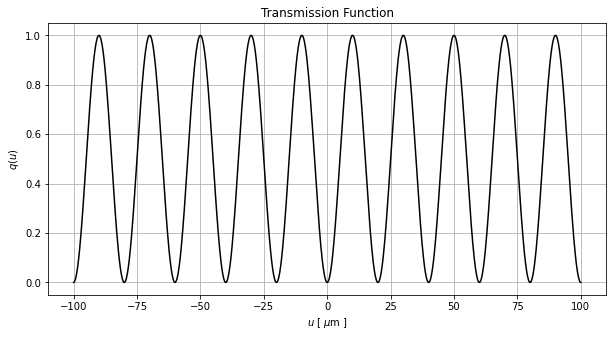

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def q(u,slit_separation):
    '''
    Transmission function
    ------------------------------------------------------------
    Arguments
    u: point location in the grid measured in micro-meters
    slit_separation: separation between slits measured in 
                     micro-meters
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    # Parameter alpha in the transmission function
    alpha = np.pi/slit_separation
    return (np.sin(alpha*u))**2

# Separtions between slits (micro-meters)
slit_separation = 20

# Total number of slits
N = 10
if N%2 == 0:
    u_m = slit_separation*N/2
else:
    u_m = slit_separation*(N+1)/2
    
urange = np.linspace(-u_m,u_m,1000)

plt.figure(figsize=(10,5))
plt.plot(urange, q(urange,slit_separation), color='black')
plt.grid()
plt.xlabel(r'$u$ [ $\mu$m ]')
plt.ylabel(r'$q(u)$')
plt.title('Transmission Function')
plt.show()

---
3. Implemente un código que calcule y grafique la intensidad del patrón de intensidad producido por la rejilla descrita en el punto anterior si esta tiene un total de 10 slits y la longitud de onda de la radiación incidente es $\lambda = 500 \text{ nm}$. Además, asuma que la longitud focal del lente es $f = 1 \text{ m}$ y que el ancho de la pantalla es de $10 \text{ cm}$.

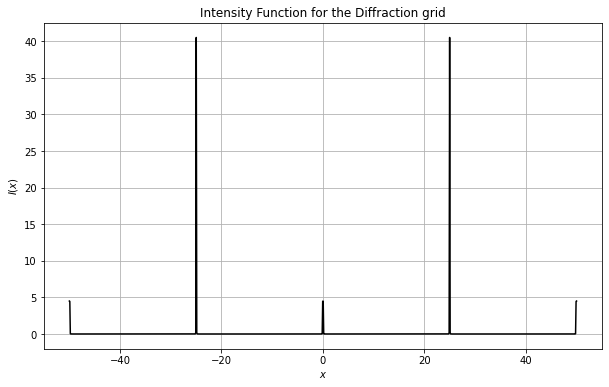

In [139]:
def Intensity(x, slit_separation=20, N=10, lmbda=500, fd=1):
    '''
    Intensity function for diffraction grid pattern.
    ------------------------------------------------------------
    Arguments
    x: distance form the center of the pattern measured in cm
    slit_separation: separation between slits measured in 
                     micro-meters 
    N: Total number of slits
    screen: Total width of the screen measured in cm
    lmbda: Wavelenght of the incident radiation measured
           in nano-meters
    fd: Focal Distance of the lens in meters
    
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    x *= 10 # cm to mm
    lmbda *= 1e-6 # nm to mm
    fd *= 1e3 # m to mm
    
    if N%2 == 0: # even
        w_half = slit_separation*N/2
    else: # odd
        w_half = slit_separation*(N+1)/2
    
    # Parameter alpha in the transmission function
    alpha = np.pi/slit_separation
    
    def q(u):
        '''
        Transmission function
        ------------------------------------------------------------
        Arguments
        u: point location in the grid measured in micro-meters
        slit_separation: separation between slits measured in 
                     micro-meters
        ------------------------------------------------------------
        Dependences: NumPy
        ------------------------------------------------------------
        '''
        return (np.sin(alpha*u))**2
        
    def f(u, x):
        return np.sqrt(q(u))*np.exp(2*np.pi*1j*x*u/(lmbda*fd))
    
    n_integ=1000 # point in the integration
    urange = np.linspace(-w_half, w_half, n_integ)
    du = urange[1] - urange[0]
    integral = 0.
    for i in range(int((n_integ-1)/2)):
        integral += (du/3)*(f(urange[2*i],x) + 4*f(urange[2*i+1],x)+ f(urange[2*i+2],x))
    return abs(integral)**2

# Screen Definition
screen_size = 10 #cm
screen_ext = screen_size*10/2 # 1/2 and cm to mm
N_screen = 1000 # Points in the screen

xrange = np.linspace(-screen_ext, screen_ext, N_screen)
intensity_pattern = np.zeros_like(xrange)

for i in range(N_screen):
    intensity_pattern[i] = Intensity(xrange[i], slit_separation=1, N=10, lmbda=500, fd=1)
    
plt.figure(figsize=(10,6))
plt.plot(xrange, intensity_pattern, color='black')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$I(x)$')
plt.title('Intensity Function for the Diffraction grid')
plt.show()

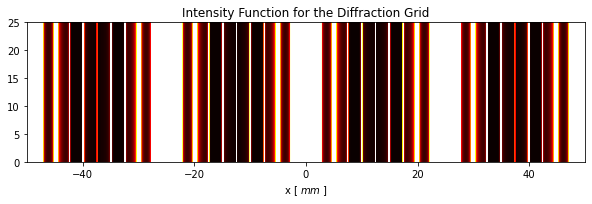

In [140]:
N_h = 1000 # Height of the pattern
xygrid = np.zeros([N_h,N_screen])
diffraction_pattern = np.zeros([N_h,N_screen])

for i in range(N_h):
    diffraction_pattern[i,:] =intensity_pattern 

extent = -screen_ext,screen_ext,0,screen_ext/2
plt.figure(figsize=(10,10))
plt.imshow(diffraction_pattern, cmap='hot', vmin=0, vmax=0.000001, extent=extent)
plt.title('Intensity Function for the Diffraction Grid')
plt.xlabel(r'x [ $mm$ ]')
plt.show()

Valores mas realistas para los valores de los parametros de la rejilla pueden ser: 1000 lineas por mm (i.e. separación entre slits de 1 $\mu$m) con un tamaño total de 5mm (i.e. un total de 5000 slits) y una lente con distancia focal de 2 m.

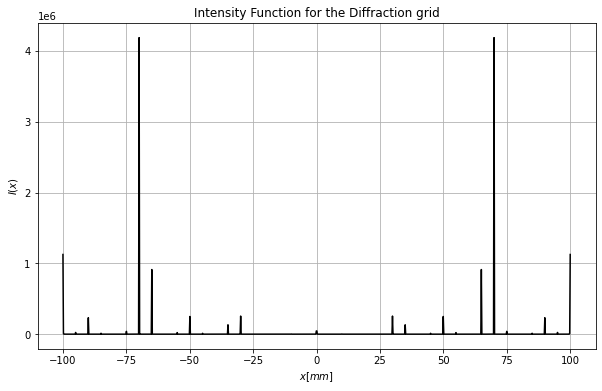

In [158]:
def Intensity(x, slit_separation=20, N=10, lmbda=500, fd=1):
    '''
    Intensity function for diffraction grid pattern.
    ------------------------------------------------------------
    Arguments
    x: distance form the center of the pattern measured in cm
    slit_separation: separation between slits measured in 
                     micro-meters 
    N: Total number of slits
    screen: Total width of the screen measured in cm
    lmbda: Wavelenght of the incident radiation measured
           in nano-meters
    fd: Focal Distance of the lens in meters
    
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    x *= 10 # cm to mm
    lmbda *= 1e-6 # nm to mm
    fd *= 1e3 # m to mm
    
    if N%2 == 0: # even
        w_half = slit_separation*N/2
    else: # odd
        w_half = slit_separation*(N+1)/2
    
    # Parameter alpha in the transmission function
    alpha = np.pi/slit_separation
    
    def q(u):
        '''
        Transmission function
        ------------------------------------------------------------
        Arguments
        u: point location in the grid measured in micro-meters
        slit_separation: separation between slits measured in 
                     micro-meters
        ------------------------------------------------------------
        Dependences: NumPy
        ------------------------------------------------------------
        '''
        return (np.sin(alpha*u))**2
        
    def f(u, x):
        return np.sqrt(q(u))*np.exp(2*np.pi*1j*x*u/(lmbda*fd))
    
    n_integ=1000 # point in the integration
    urange = np.linspace(-w_half, w_half, n_integ)
    du = urange[1] - urange[0]
    integral = 0.
    for i in range(int((n_integ-1)/2)):
        integral += (du/3)*(f(urange[2*i],x) + 4*f(urange[2*i+1],x)+ f(urange[2*i+2],x))
    return abs(integral)**2

# Screen Definition
screen_size = 20 #cm
screen_ext = screen_size*10/2 # 1/2 and cm to mm
N_screen = 1000 # Points in the screen

xrange = np.linspace(-screen_ext, screen_ext, N_screen)
intensity_pattern = np.zeros_like(xrange)

for i in range(N_screen):
    intensity_pattern[i] = Intensity(xrange[i], slit_separation=1, N=5000, lmbda=500, fd=2)
    
plt.figure(figsize=(10,6))
plt.plot(xrange, intensity_pattern, color='black')
plt.grid()
plt.xlabel(r'$x[mm]$')
plt.ylabel(r'$I(x)$')
plt.title('Intensity Function for the Diffraction grid')
plt.show()

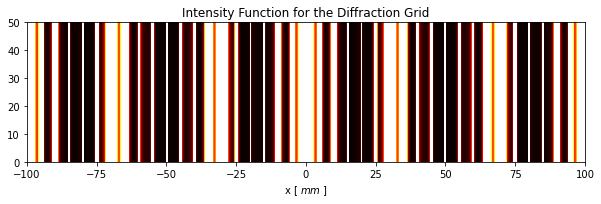

In [172]:
N_h = 1000 # Height of the pattern
xygrid = np.zeros([N_h,N_screen])
diffraction_pattern = np.zeros([N_h,N_screen])

for i in range(N_h):
    diffraction_pattern[i,:] =intensity_pattern 

extent = -screen_ext,screen_ext,0,screen_ext/2
plt.figure(figsize=(10,10))
plt.imshow(diffraction_pattern, cmap='hot', vmin=0, vmax=0.1, extent=extent)
plt.title('Intensity Function for the Diffraction Grid')
plt.xlabel(r'x [ $mm$ ]')
plt.show()